<a href="https://colab.research.google.com/github/yogasgm/companysite/blob/main/practice_material/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with IndoBERT**

##**Importing required libraries**

In [1]:
# Install Huggingface Transformers
! pip install  huggingface transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.9 MB/s eta 0:00:00


In [2]:
import requests
import pandas as pd
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

##**Import Dataset from Apify Runs**

In [3]:
# Fetching the dataset from Apify
api_url = "https://api.apify.com/v2/datasets/na5aYoW2Rcrm9h08r/items"
api_token = "apify_api_NbL3VeatZbemul8vsNCyVKRhzmRv0M0Wh9ql"  # Substitute with your actual API token


In [4]:
# Making a GET request to the API
params = {"token": api_token, "format": "json"}  # parameter untuk permintaan
response = requests.get(api_url, params=params)

# Checking the response status
if response.status_code == 200:  # Sukses
    # Processing the JSON data into a pandas DataFrame
    data = response.json()
    df_tweet = pd.DataFrame(data)

    # Saving the DataFrame to a CSV file
    df_tweet.to_csv("twitter_data.csv", index=False)
    print("Data berhasil diunduh dan disimpan sebagai twitter_data.csv")
else:
    print(f"Terjadi kesalahan: {response.status_code}. Pesan: {response.text}")

Data berhasil diunduh dan disimpan sebagai twitter_data.csv


##**Loading the IndoBERT Model**

In [5]:
# Download Pretrained Model
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

In [6]:
# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Create sentiment classifier using huggingface pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

##**Performing Sentiment Analysis**

In [7]:
def get_sentiment(text):
    # Tokenize text and truncate to ensure it doesn't exceed the maximum limit
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:min(len(tokens), 512 - 2)]  # 2 tokens for [CLS] and [SEP]

    # Convert tokens back to string
    truncated_text = tokenizer.convert_tokens_to_string(tokens)

    # Get sentiment
    output = sentiment_analysis(truncated_text)[0]
    label = label_index[output['label']]
    score = output['score']
    return label, score

In [8]:
# Set Label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

In [9]:
# Test with one sentence
text = "Bank Indonesia kacau balau"
sentiment, score = get_sentiment(text)
print(f'The sentiment is: {sentiment} with a score of: {score}')

The sentiment is: negative with a score of: 0.996809184551239


##**Applying Sentiment Analysis to Dataframe**

In [10]:
# Get sentiment label for each row in dataframe
df_tweet[['sentiment', 'score']] = df_tweet['text'].apply(lambda x: pd.Series(get_sentiment(x)))

In [11]:
# Show Tweet with sentiment
df_tweet[['text', 'sentiment', 'score']]

,text,sentiment,score
0,Disiplin Fiskal: Rasio utang lebih dari 60% da...,negative,0.617929
1,"BI Kerek Suku Bunga Acuan, Pengusaha Berharap ...",neutral,0.996118
2,[BREAKING] Bank Indonesia menaikkan suku bunga...,neutral,0.997546
3,#EURUSD : Menanti Kebijakan Suku Bunga ECB an...,neutral,0.996434
4,Muncul di browse youtube gua video finfluencer...,negative,0.996976
...,...,...,...
498,Terbaru! Konsensus Ekonom Ramal BI Tahan Suku ...,neutral,0.994376
499,IHSG Diprediksi Sideways Menanti Suku Bunga BI...,neutral,0.995327
500,"Selepas keluar dari Mesir, Bani Israil mendiri...",neutral,0.887508
501,Pagi. Semalam bursa AS ditutup melemah di teng...,neutral,0.996609


<Axes: xlabel='sentiment', ylabel='count'>

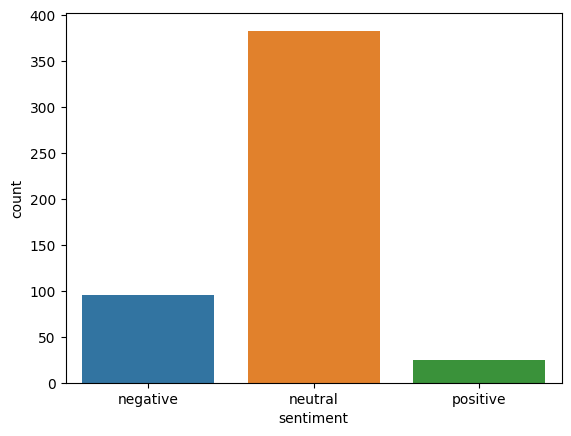

In [12]:
# Visualise the sentiment distribution
sns.countplot(x ='sentiment', data = df_tweet)